# 02. EDA, Exploratory Data Analysis

* EDA(탐색적 데이터 분석)이란, 요약 및 시각화 등을 통해 데이터를 이해하고, 그에 맞는 전처리를 하는 분석 과정을 말한다.

## Setting

In [144]:
import pandas as pd 
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [145]:
data_path = "data/naver_review_raw_data.csv"
data = pd.read_csv(data_path)
data.head(5)

,reviewer,review,additional_info,date,n_visit,auth_method
0,shooooooo,종류도 알차게 많고 다 맛있어요!,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024년 6월 7일 금요일,1번째 방문,영수증
1,gudrmfl2,맛나요,"예약 후 이용, 대기 시간 10분 이내, 데이트, 연인·배우자",2024년 6월 7일 금요일,1번째 방문,영수증
2,코코리383,맛있어요,"예약 없이 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024년 5월 28일 화요일,1번째 방문,영수증
3,vivajin,좋아요,NaN,2024년 5월 25일 토요일,1번째 방문,영수증
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\n역시...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024년 5월 23일 목요일,1번째 방문,결제내역


In [146]:
# 데이터 중복 제거 
print(f"BEFORE: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"AFTER: {data.shape}")

BEFORE: (503, 6)
AFTER: (481, 6)


## 1. 데이터 재정의

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer         481 non-null    object
 1   review           481 non-null    object
 2   additional_info  57 non-null     object
 3   date             481 non-null    object
 4   n_visit          481 non-null    object
 5   auth_method      481 non-null    object
dtypes: object(6)
memory usage: 26.3+ KB


### 1) `additional_info`

* 많은 정보를 파악하기 위해 수집했으나, 그에 비해 결측치가 많은 것으로 나타남. 
* 그 개수가 10분의 1이 되지 않았기에 분석에서 제외함.

### 2) `date`

* 날짜이기 때문에 datetime으로 변환
* 편의를 위해 날짜와 요일을 두 개의 열로 분리함

In [148]:
data["weekday"] = data["date"].str[-3:]
data["date"] = pd.to_datetime(data["date"].str[:-4], format="%Y년 %m월 %d일")

data.head(5)

,reviewer,review,additional_info,date,n_visit,auth_method,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요!,"예약 후 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-06-07,1번째 방문,영수증,금요일
1,gudrmfl2,맛나요,"예약 후 이용, 대기 시간 10분 이내, 데이트, 연인·배우자",2024-06-07,1번째 방문,영수증,금요일
2,코코리383,맛있어요,"예약 없이 이용, 대기 시간 바로 입장, 데이트, 연인·배우자",2024-05-28,1번째 방문,영수증,화요일
3,vivajin,좋아요,NaN,2024-05-25,1번째 방문,영수증,토요일
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\n역시...,"예약 없이 이용, 대기 시간 10분 이내, 일상, 친척·형제",2024-05-23,1번째 방문,결제내역,목요일


### 3) `n_visit`

* 재방문 수이기 때문에 int로 변환

In [149]:
data["n_visit"] = data["n_visit"].str[0].astype(int)
data["n_visit"].value_counts()

n_visit
1    455
2     23
5      1
4      1
3      1
Name: count, dtype: int64

### 4) `auth_method`

* 대부분이 영수증이어서 분석에서 제외함

In [150]:
data["auth_method"].value_counts()

auth_method
영수증     471
예약        6
결제내역      4
Name: count, dtype: int64

### 5) `review`

In [186]:
# 교정
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=de9f0d2fc72d5cf092ceb0dceb939549febfd4f8&_callback=jQuery1124019186862435357321_1719966620077&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1719966620078"

spell_checker("아버지가 방에 드르감", requestURL)

ModuleNotFoundError: No module named 'hanspell'

In [182]:
review_len = data["review"].str.len()
review_len.describe()

count    481.000000
mean      46.746362
std       71.821640
min        1.000000
25%        6.000000
50%       19.000000
75%       56.000000
max      399.000000
Name: review, dtype: float64

## 2. 데이터 탐색

### ⭐️ `data2`

In [151]:
# 분석에 이용되지 않는 열 제거
data2 = data.drop(columns=["additional_info", "auth_method"])
data2.head(5)

,reviewer,review,date,n_visit,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요!,2024-06-07,1,금요일
1,gudrmfl2,맛나요,2024-06-07,1,금요일
2,코코리383,맛있어요,2024-05-28,1,화요일
3,vivajin,좋아요,2024-05-25,1,토요일
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\n역시...,2024-05-23,1,목요일


### 1) 재방문한 사람들은 어떤 댓글을 남겼을까?

* 똑같은 날짜에 방문했는데도 `n_visit`만 다르고 내용이 똑같다는 것을 확인. 
* `n_visit` 변수를 지우고 중복 제거를 다시했다. 
* 반응이 반전되는 경우는 거의 없으며, 대부분 같은 반응을 보였다.

In [152]:
revisitor_data = data2["reviewer"].value_counts()
revisitor = revisitor_data[revisitor_data > 1].index
data2.loc[data2["reviewer"].isin(revisitor),:].sort_values(by=["reviewer","n_visit"])

,reviewer,review,date,n_visit,weekday
124,AtoZer,고급진 셀렉션도 많고 뷔페로써 부족함 없는 구성 입니다 분위기나 서비스도 맘에 들었...,2023-03-05,1,일요일
56,AtoZer,신라호텔 더파크뷰♥️ 호텔 뷔페 중에서도 음식의 퀄리티와 맛이 단연 으뜸이라 할 수...,2023-11-10,2,금요일
310,ERANGMAM,"특별한날 방문하기 너무 좋아요\n음식도 항상 신선하고 맛있고,\n무엇보다 직원들 너...",2022-02-05,1,토요일
33,ERANGMAM,애기가 스테이크 너무 잘먹었어요\n언제나 더파크뷰는 흠이없어요 친절함과 식사의 품질...,2024-01-03,2,수요일
235,TechnoMBA,맛있어요,2022-07-01,1,금요일
234,TechnoMBA,신라호텔 뷔페식당 더파크뷰입니다.\n남산자락에 위치한 호텔뷔페. 정말 맛있고 직원들...,2022-07-01,2,금요일
314,big****,긋,2022-02-04,1,금요일
313,big****,긋,2022-02-04,2,금요일
312,big****,긋,2022-02-04,3,금요일
311,big****,긋,2022-02-04,4,금요일


### ⭐️ `data3`

In [153]:
# 열 삭제 후 데이터 중복 제거
data3 = data2.drop(columns=["n_visit"])
print(f"BEFORE: {data3.shape}")
data3.drop_duplicates(inplace=True)
print(f"AFTER: {data3.shape}")

BEFORE: (481, 4)
AFTER: (477, 4)


In [154]:
data3.head()

,reviewer,review,date,weekday
0,shooooooo,종류도 알차게 많고 다 맛있어요!,2024-06-07,금요일
1,gudrmfl2,맛나요,2024-06-07,금요일
2,코코리383,맛있어요,2024-05-28,화요일
3,vivajin,좋아요,2024-05-25,토요일
4,쥴리08,커피랑 브런치.크림파스타 먹었어요~\n오늘따라 파스타가 불어서나왔더라구요ㅠㅠ\n역시...,2024-05-23,목요일


### 2) 언제 가장 리뷰가 활발했을까?

* 2022년에 가장 많이 활발한 것으로 나타남.

In [161]:
subdata = data3["date"].value_counts(sort=False)

In [162]:
# 사람들이 가장 많이 리뷰를 쓴 날
subdata.sort_values(ascending=False).iloc[:5]

date
2022-09-17    6
2022-04-02    4
2021-05-28    4
2022-05-15    4
2022-06-03    4
Name: count, dtype: int64

In [157]:
# 사람들이 가장 많이 리뷰를 쓴 날의 반응들
data3[data3["date"]=="2022-09-17"]

,reviewer,review,date,weekday
192,청솔9988,굿,2022-09-17,토요일
193,sun****,좋아요,2022-09-17,토요일
194,히히히히히6,진짜 맛있었고 기념일로 가기도 좋아요,2022-09-17,토요일
195,sym****,"예전에 비해 가지수가 준것 같지만, 여전히 맛있습니다. 근데 사람이 정말 많네요^^;",2022-09-17,토요일
196,활짝3868,예전에 신라호텔 뷔페 갔을때 보다 메뉴의 가짓수는 줄었지만 메뉴등 퀄리티가 훨씬 좋...,2022-09-17,토요일
197,게으른냐옹,신라는 역시 디저트가 좋아요 디저트와 친절함에 기분이 좋아집니다ㅎㅎ 꽤 오랫만에 신...,2022-09-17,토요일


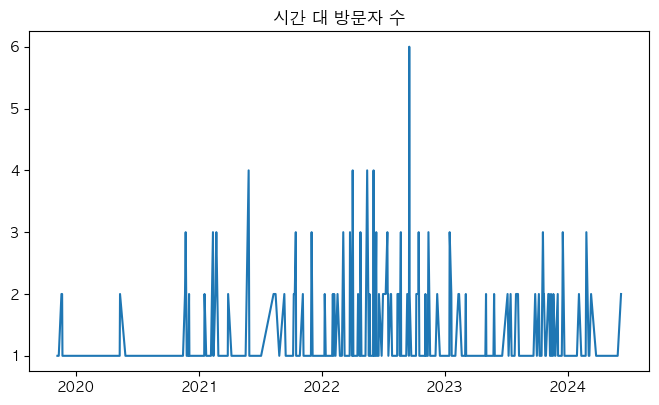

In [167]:
fig, ax = plt.subplots(figsize=(8, 5))
subdata.plot(ax=ax)

# title 설정
ax.set(title = "시간 대 방문자 수", xlabel = "")
# x축 주요 눈금을 년도 단위로 설정
ax.xaxis.set_major_locator(mdates.YearLocator())
# x축 라벨 형식을 년도로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# x축 요소 라벨 설정
for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

plt.show()

### 3) 요일로 나타내면 어떻게 될까?

* 예상한대로 금, 토, 일에 가장 활발이 방문이 이루어진 것으로 보인다.

In [169]:
subdata = data3["weekday"].value_counts()
subdata

weekday
토요일    111
일요일    111
금요일     79
목요일     51
월요일     46
수요일     45
화요일     34
Name: count, dtype: int64

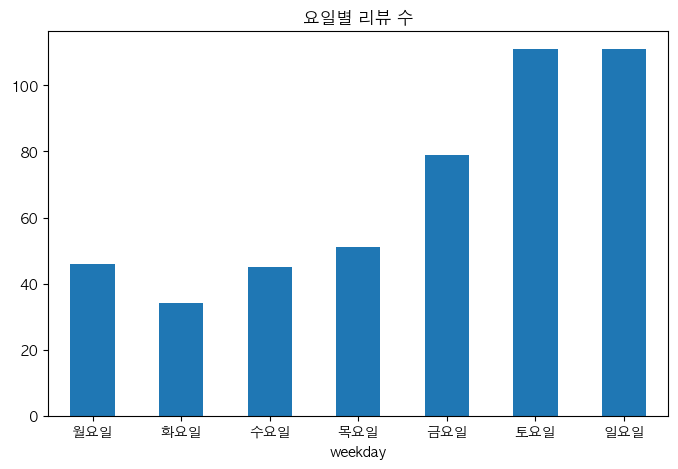

In [170]:
fig, ax = plt.subplots(figsize=(8, 5))
weekdays = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]
subdata[weekdays].plot(ax=ax, kind="bar")

# title 설정
ax.set_title("요일별 리뷰 수")
# x축 요소 라벨 설정
for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

plt.show()

## 3. 결론

* 전처리 과정
    - 중복 제거
    - 정보가 너무 적어 필요없는 열 제거 `additional_info`
    - 아이디, 방문 날짜, n번째 방문이 잘 맞지 않는 것을 확인. `n_visit` 열 삭제 후 다시 중복 제거

* 의미 있는 결과 및 나의 생각
    - 리뷰가 22년부터 활발해진 것으로 나타났으며, 23년보다 22년에 가장 활발했다.
    - 22년과 23년의 리뷰 반응을 비교해보는 것도 좋을 것 같다. 